In [2]:
%load_ext autoreload
%autoreload 2

# Static Potential Analysis

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

model = "Z2_dual"
path = "pc"
cx = [3,37]
cy = [3,3]
# cx = None
# cy = None

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [57]:
def plot_energy_difference(L, l, chi, h_i, h_f, npoints, cxs, cy):
    hs = np.linspace(h_i,h_f,npoints)

    colors = create_sequential_colors(len(cxs))
    e_diffs = []
    for i, cx in enumerate(cxs):
        energy_charges = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_vacuum = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_difference = np.abs(energy_charges - energy_vacuum)
        e_diffs.append(energy_difference)
        R = np.abs(cx[-1] - cx[0])
        plt.plot(hs, energy_difference, color=colors[i], label=f"R={R}")
    plt.title(f"Energy difference of $Z_2$ direct lattice ${l}$x${L}$")
    plt.legend()
    plt.savefig(f"{parent_path}/figures/energy/energy_difference_for_some_electric_strings_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
    return e_diffs

def plot_energy_difference_gr(L, l, chi, h_i, h_f, npoints, cxs, cy):
    hs = np.linspace(h_i,h_f,npoints)

    colors = create_sequential_colors(len(cxs))
    e_diffs = []
    for i, cx in enumerate(cxs):
        energy_charges = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_vacuum = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        energy_difference = np.abs(energy_charges - energy_vacuum)
        e_diffs.append(energy_difference)
        R = np.abs(cx[-1] - cx[0])
        plt.plot(hs*R, energy_difference, color=colors[i], label=f"R={R}")
    plt.title(f"Energy difference of $Z_2$ direct lattice ${l}$x${L}$")
    plt.xlabel("gR")
    plt.ylabel("$E_0^{vacuum}-E_0^{R}$")
    plt.legend()
    # plt.legend("R=2 to R=38")
    plt.savefig(f"{parent_path}/figures/energy/energy_difference_for_some_electric_strings_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
    return e_diffs

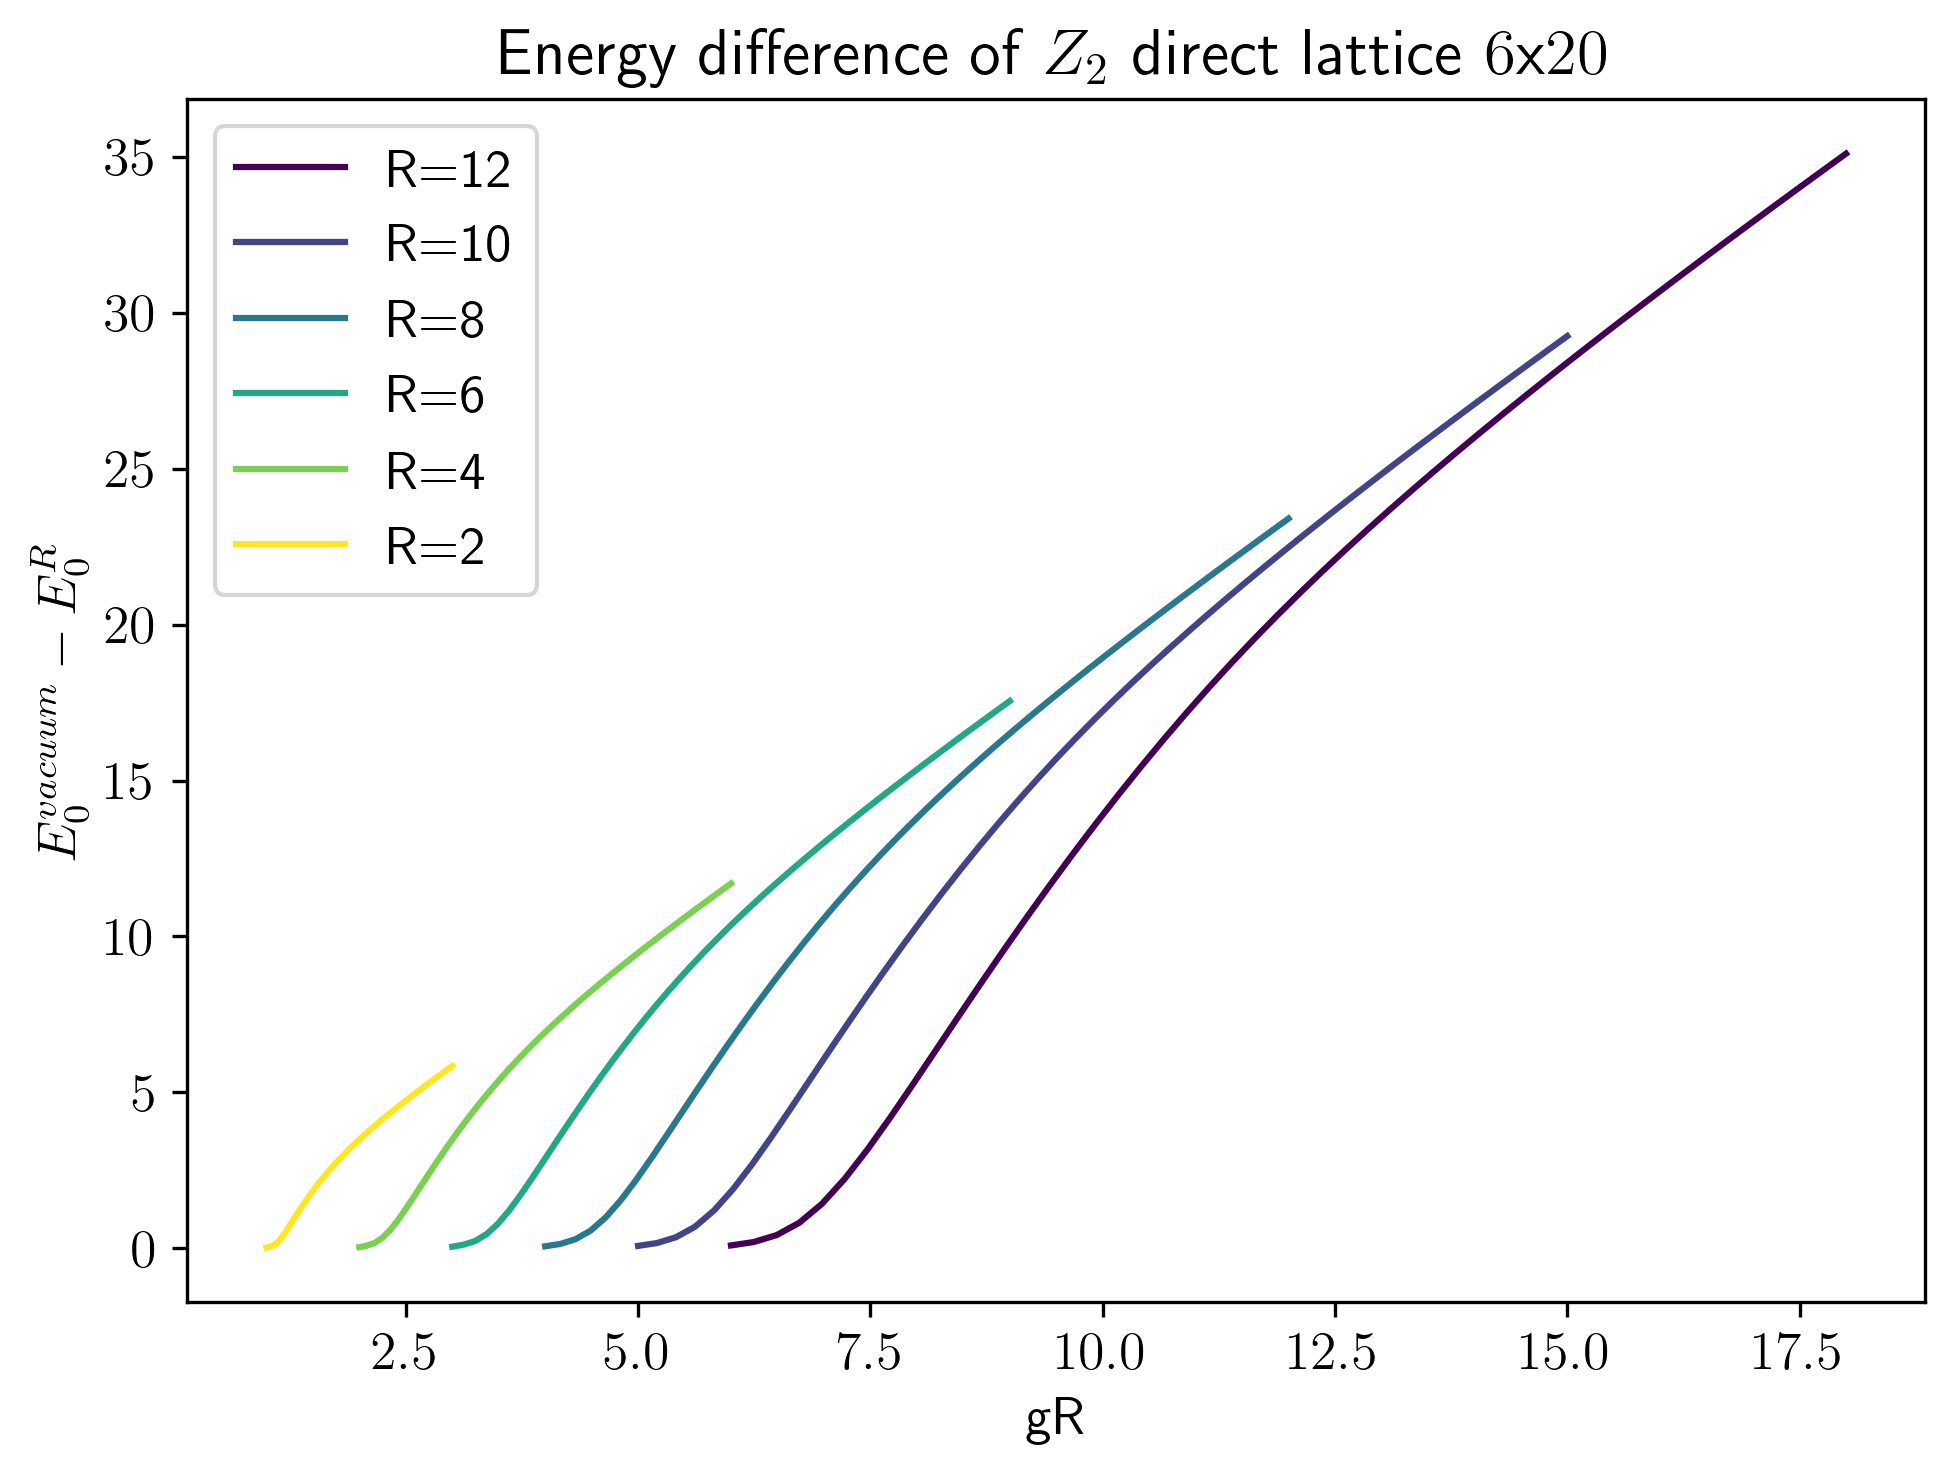

In [65]:
L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.5, 1.5, 50
cxs = [[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]]
cxs = [[1,39],[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
       [9,31],[10,30],[11,29],[12,28],[13,27],[14,26],[15,25],
       [16,24],[17,23],[18,22],[19,21]]

L, l, chi, h_i, h_f, npoints = 20, 6, 16, 0.5, 1.5, 50
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]
cxs = [[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]

ends = plot_energy_difference_gr(L,l,chi,h_i,h_f,npoints,cxs,cy)

In [63]:
def plot_static_potential(L, l, chi, h_i, h_f, npoints, cxs, cy, idxs, plot=True):
    hs = np.linspace(h_i,h_f,npoints)
    e_h = []
    rs = []
    for i, h in enumerate(hs):        
        if h in hs[idxs]:
            for j, cx in enumerate(cxs):
                energy_charges = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
                energy_vacuum = np.load(f"{parent_path}/results/energy_data/energy_Z2_dual_direct_lattice_{l}x{L}_vacuum_sector_None-None_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
                e_r = energy_charges[i] - energy_vacuum[i]
                e_h.append(e_r)
                rs.append(np.abs(cx[-1] - cx[0]))
            if plot:
                plt.plot(rs, e_h, color='firebrick', marker='o', label=f"h={round(h,2)}")
    if plot:
        # plt.yscale('log')
        plt.title(f"Static Potential of $Z_2$ direct lattice ${l}$x${L}$")
        plt.xlabel("Fluxtube length (R)")
        plt.ylabel("Static potential V(R,g)")
        plt.legend()
        plt.savefig(f"{parent_path}/figures/energy/static_potential_for_some_electric_strings_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")
    return e_h, rs

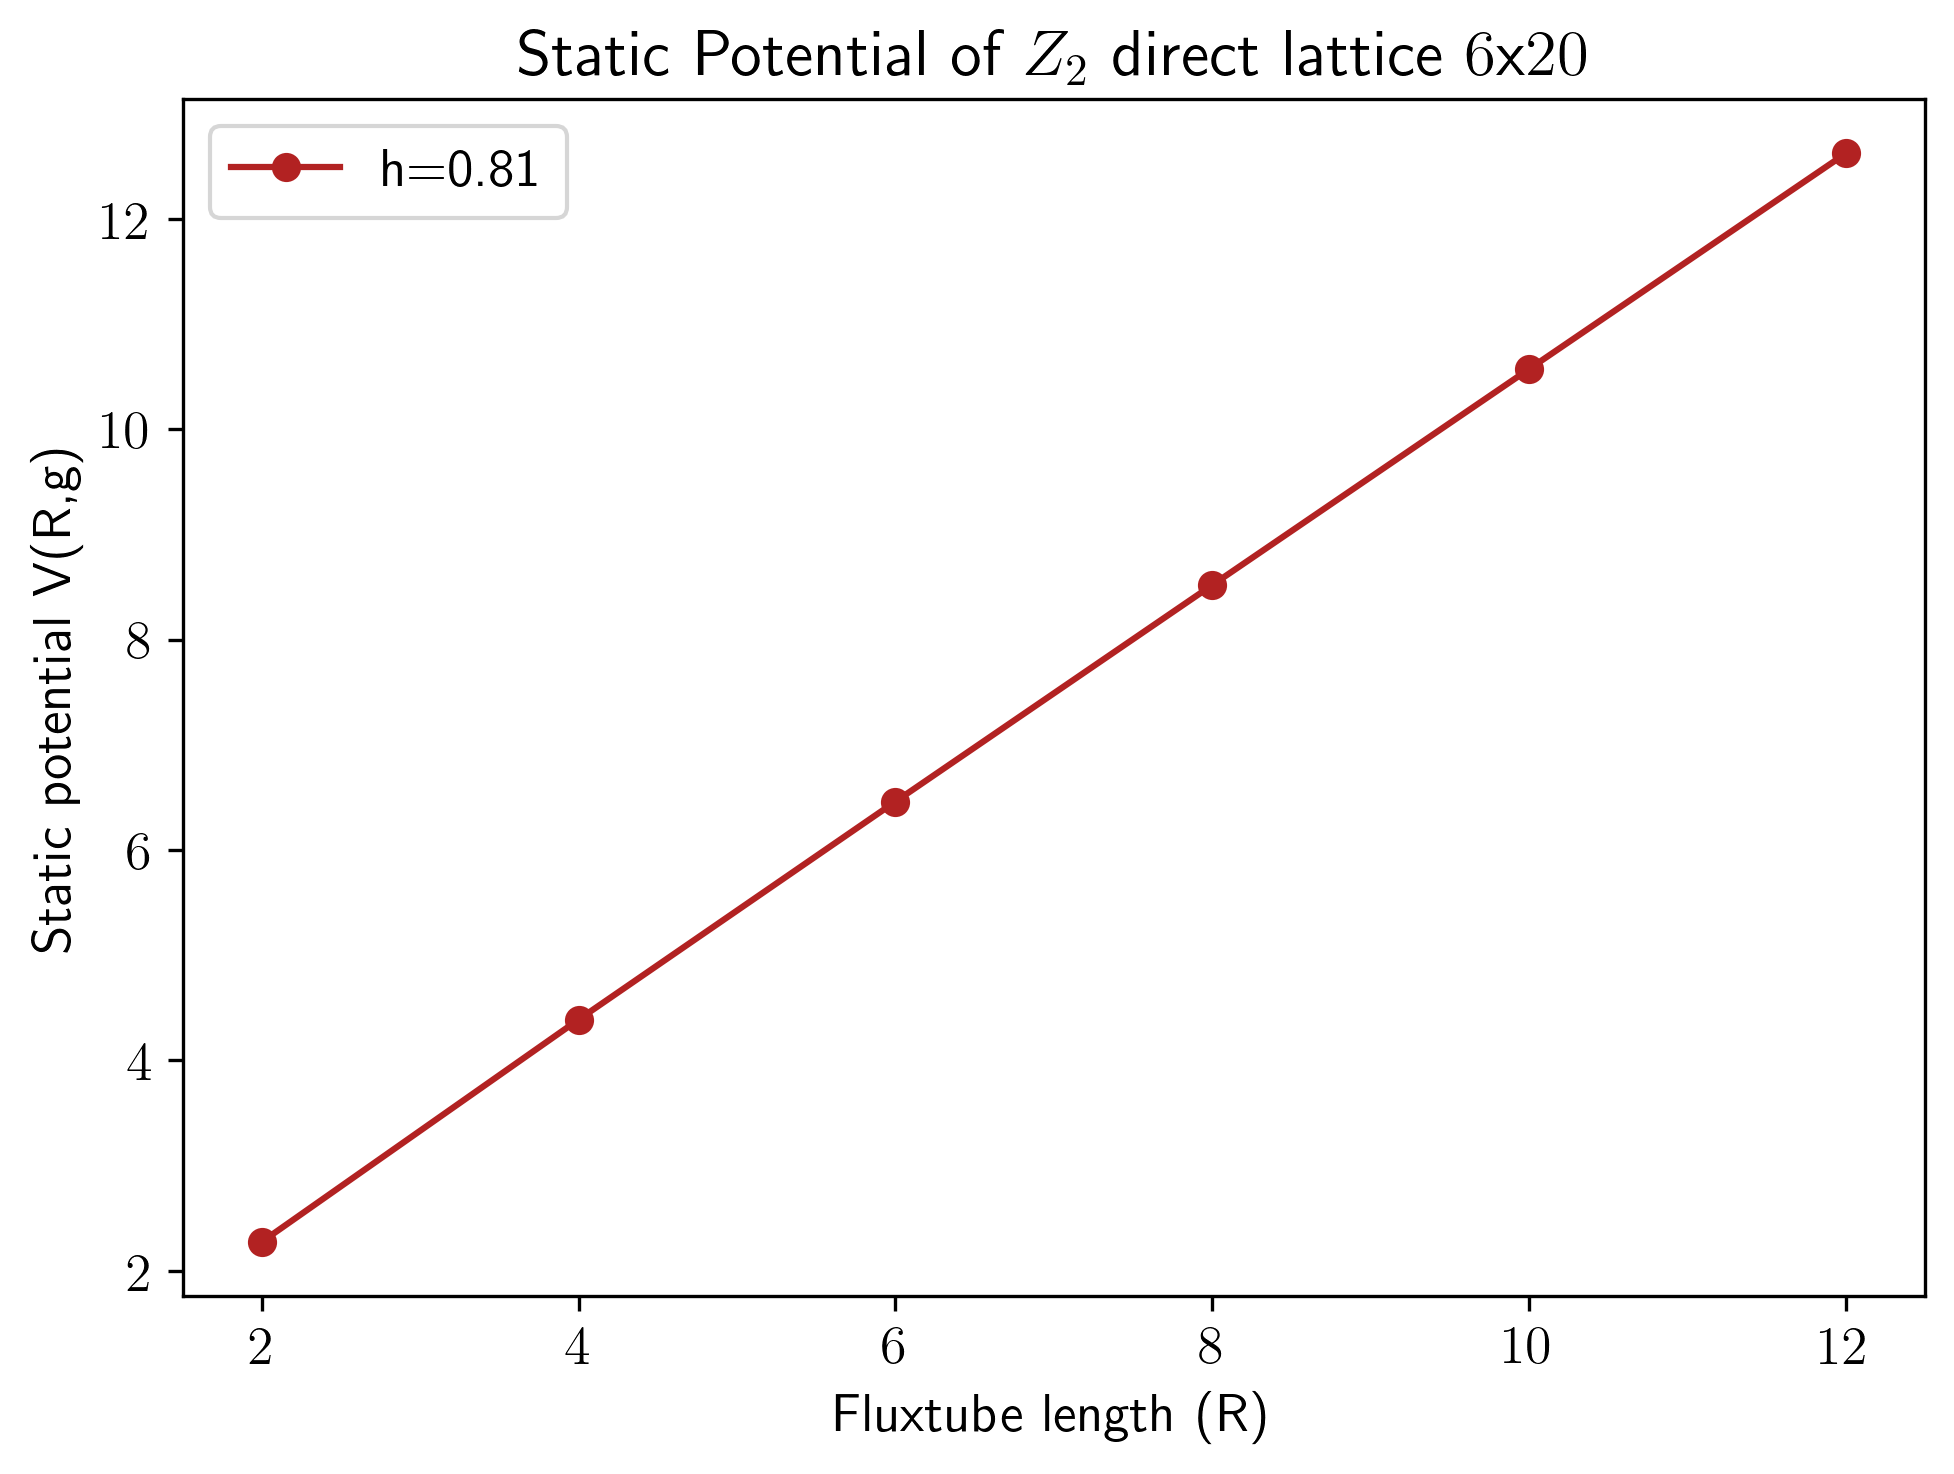

In [66]:
idxs =[15]
stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs)

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_12740\3148455756.py:5: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=rs[0], xmax=rs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")


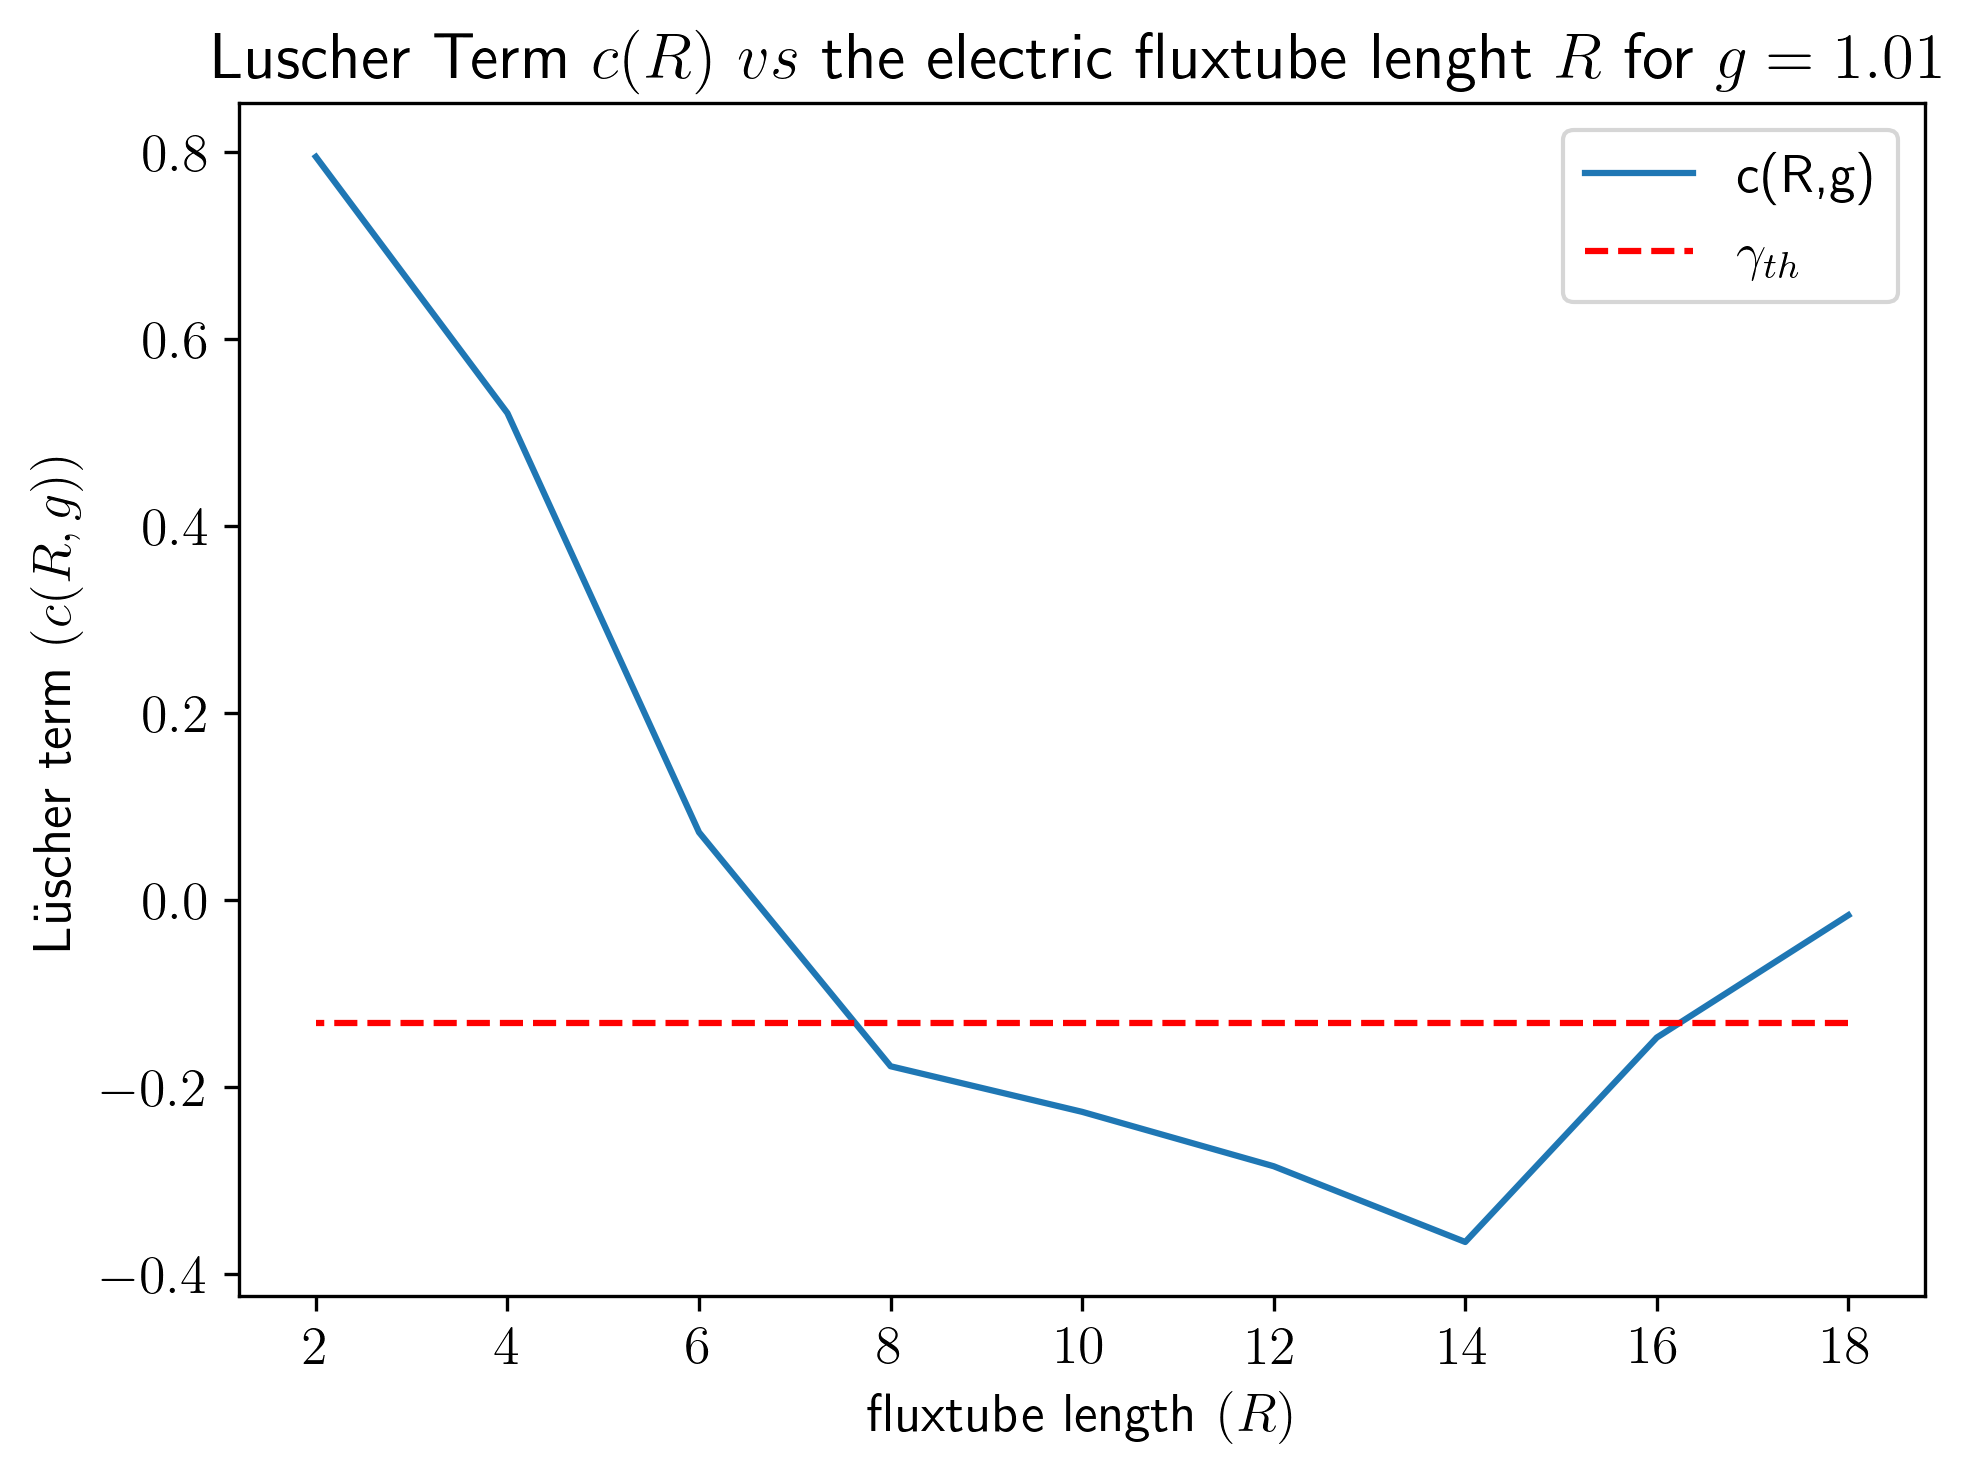

In [10]:
hs = np.linspace(h_i,h_f,npoints)
h_r = round(hs[idxs[0]],2)
const = (1/2) * (np.array(rs)**3) * np.gradient(np.gradient(stpot))
plt.plot(rs, const[::-1], label="c(R,g)")
plt.hlines(y=-np.pi/24, xmin=rs[0], xmax=rs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.title(f"Luscher Term $c(R)$ $vs$ the electric fluxtube lenght $R$ for $g={h_r}$")
plt.xlabel("fluxtube length $(R)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend()

plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_for_h_{h_r}_func_R_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

In [204]:
[c for c in const][-1]

-0.016042982190811017

In [205]:
-np.pi/24

-0.1308996938995747

In [11]:
hs = np.linspace(h_i,h_f,npoints)
idx = -2
const_h = []
for i, h in enumerate(hs):
    idxs =[i]
    stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
    const = ((1/2) * (np.array(rs)**3) * np.gradient(np.gradient(stpot)))[idx]
    const_h.append(const)

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_12740\2412397607.py:3: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")


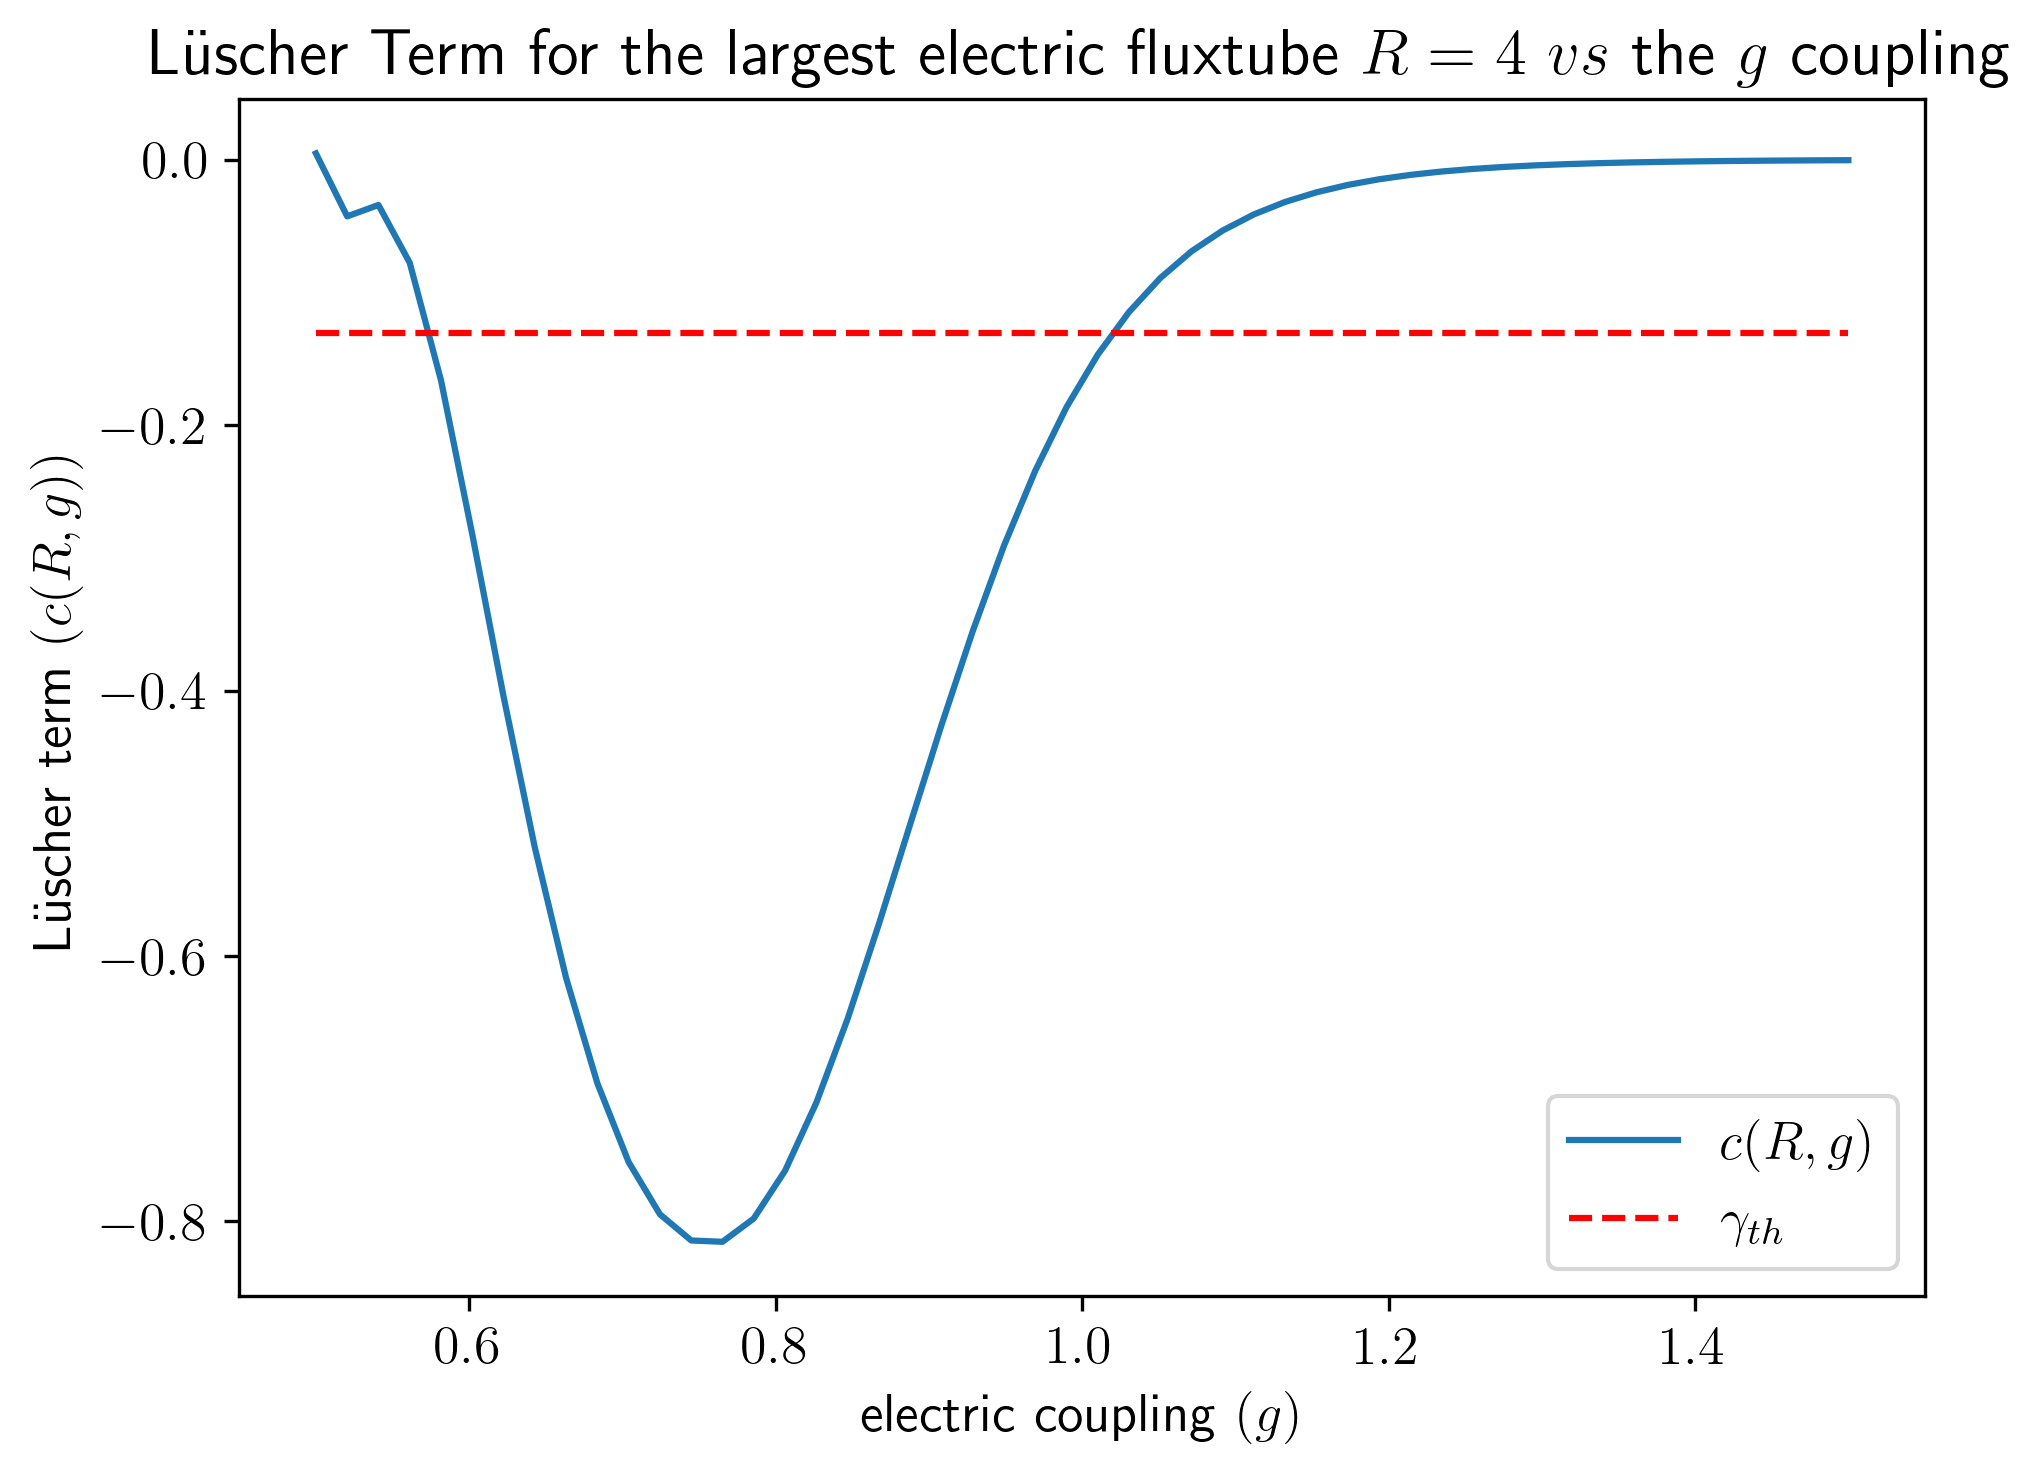

In [12]:
largest_R = np.abs(cxs[idx][0]-cxs[idx][1])
plt.plot(hs, const_h, label='$c(R,g)$')
plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.title(f"Lüscher Term for the largest electric fluxtube $R={largest_R}$ $vs$ the $g$ coupling")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend()
plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_for_R_{largest_R}_func_g_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

<>:13: SyntaxWarning: invalid escape sequence '\g'
<>:13: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_12740\1678128649.py:13: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")


(-2.0, 0.2)

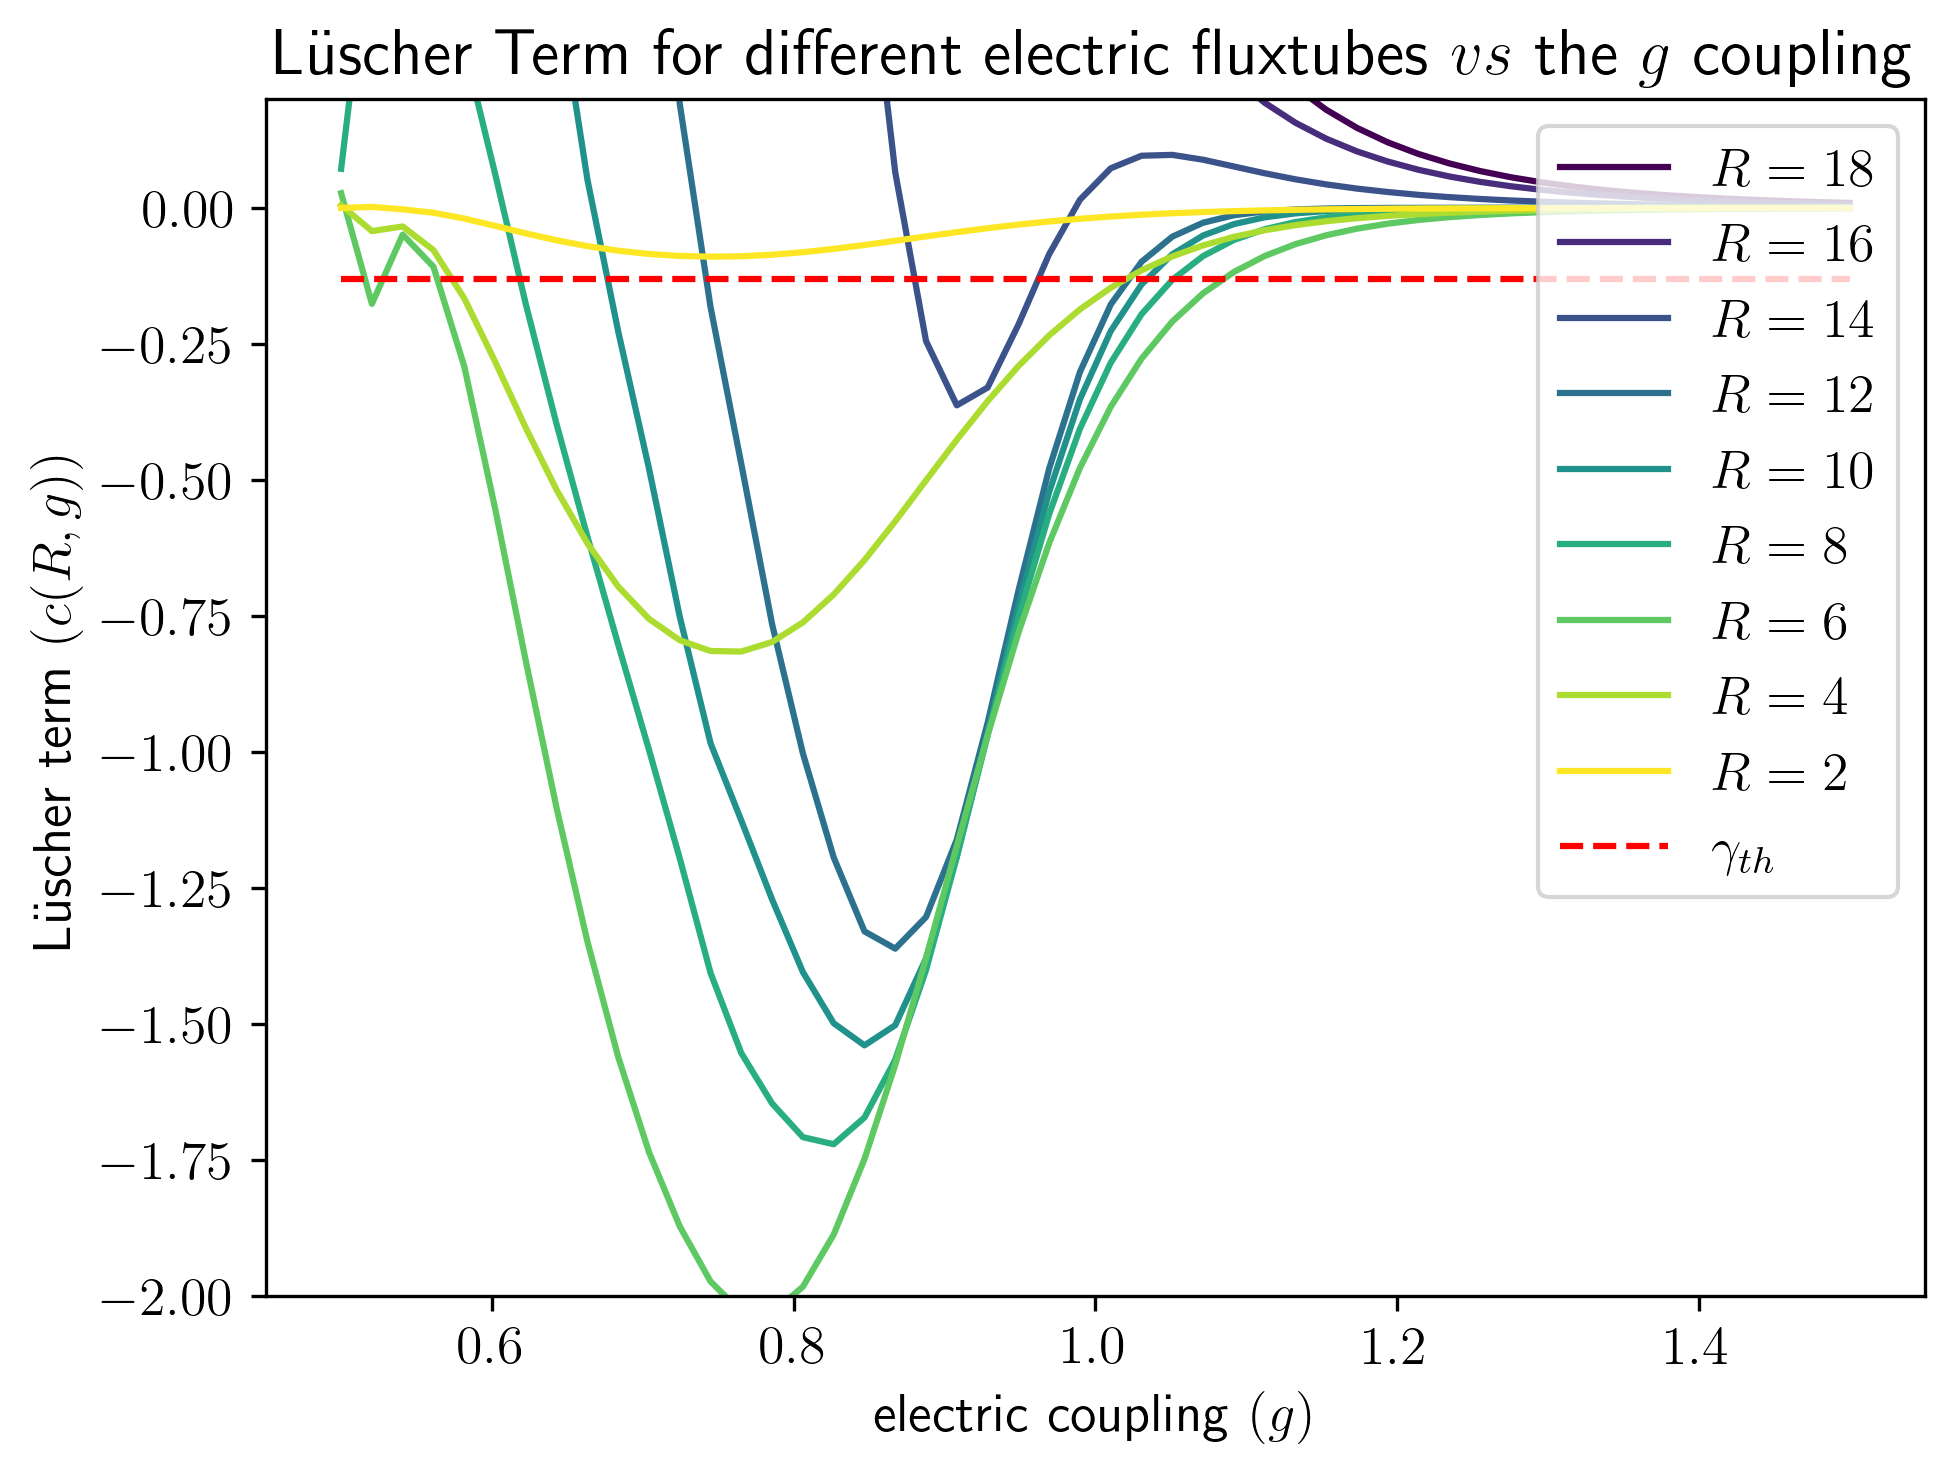

In [13]:
hs = np.linspace(h_i,h_f,npoints)
idx = -6
colors = create_sequential_colors(len(cxs))
for idx, cx in enumerate(cxs):
    const_h = []
    largest_R = np.abs(cxs[idx][0]-cxs[idx][1])
    for i, h in enumerate(hs):
        idxs =[i]
        stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
        const = ((1/2) * (np.array(rs)**3) * np.gradient(np.gradient(stpot)))[idx]
        const_h.append(const)
    plt.plot(hs, const_h, color=colors[idx], label=f'$R={largest_R}$')
plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.title(f"Lüscher Term for different electric fluxtubes $vs$ the $g$ coupling")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend(loc="upper right")
plt.ylim((-2,0.2))
# plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_for_different_R_func_g_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")

## Fitting the potential

In [73]:
L, l, chi, h_i, h_f, npoints = 20, 6, 16, 0.5, 1.5, 50
cxs = [[1,19],[2,18],[3,17],[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]
cxs = [[4,16],[5,15],[6,14],[7,13],[8,12],[9,11]]

L, l, chi, h_i, h_f, npoints = 40, 6, 64, 0.5, 1.5, 50
cxs = [[9,31],[10,30],[11,29],[12,28],[13,27]] # r_min = 20, r_max = 30
cxs = [[1,39],[2,38],[3,37],[4,36],[5,35],[6,34],[7,33],[8,32],
       [9,31],[10,30],[11,29],[12,28],[13,27],[14,26],[15,25],
       [16,24],[17,23],[18,22],[19,21]] # all
cxs = [[5,35],[6,34],[7,33],[8,32],[9,31],[10,30]] # r_min = 20, r_max = 30

In [74]:
def luscher_law(r, sigma, mu, gamma):
    return sigma*r + mu + gamma/r

gammas = []
for i in range(npoints):
    idxs =[i]
    stpot, rs = plot_static_potential(L,l,chi,h_i,h_f,npoints,cxs,cy,idxs, plot=False)
    plu, clu = curve_fit(luscher_law, rs, stpot)
    gammas.append(plu[2])

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HP\AppData\Local\Temp\ipykernel_12740\2634405146.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")


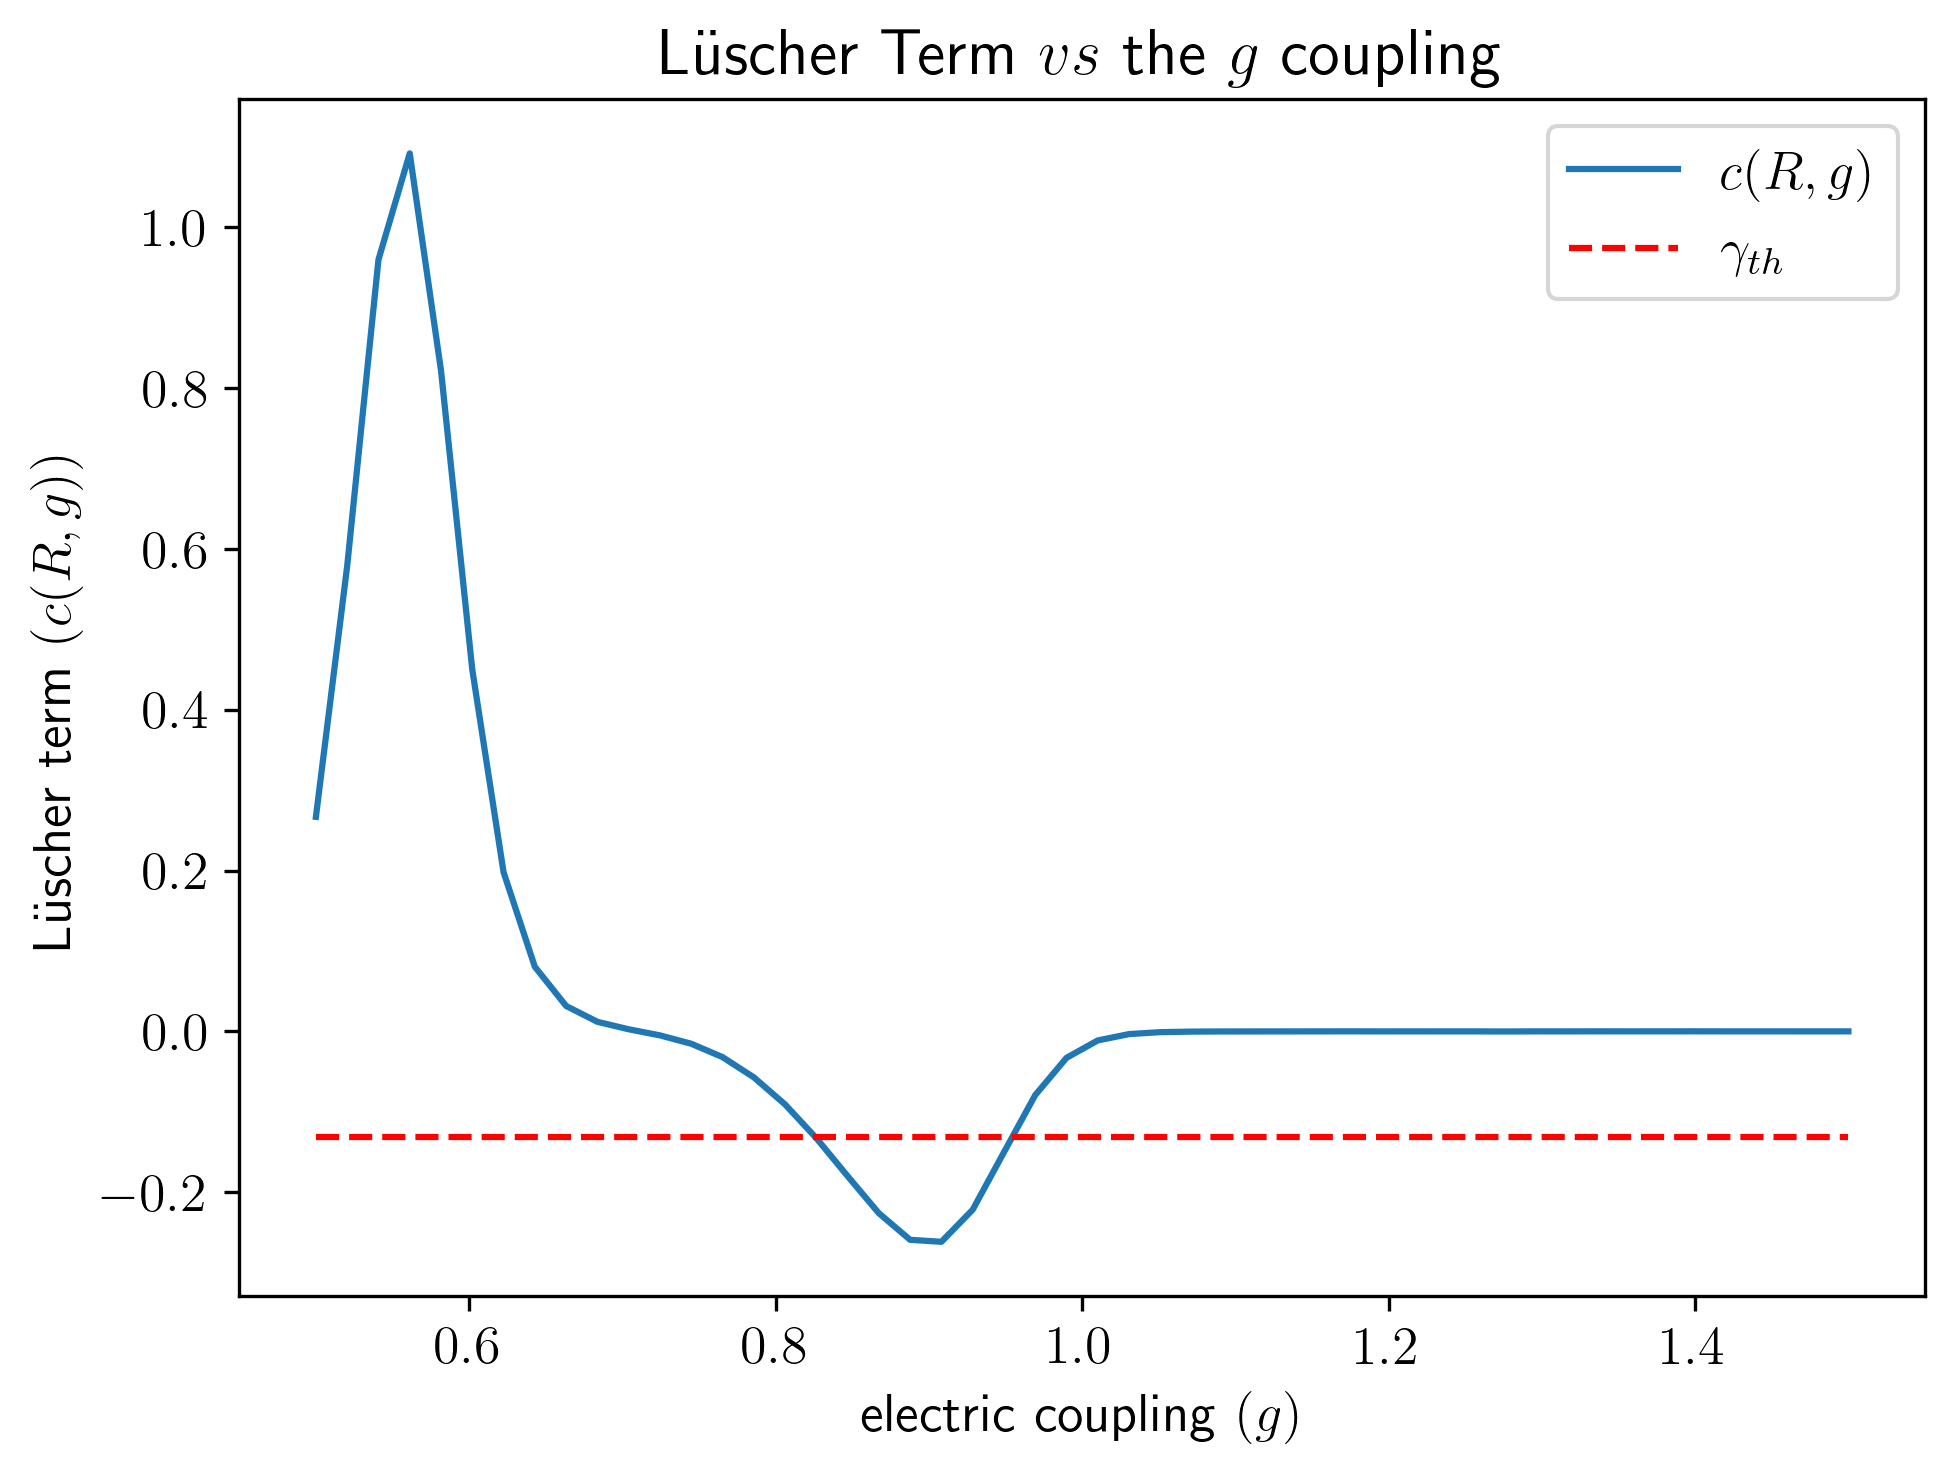

In [75]:
plt.plot(hs, gammas, label='$c(R,g)$')
plt.hlines(y=-np.pi/24, xmin=hs[0], xmax=hs[-1], linestyles='--', colors='r', label="$\gamma_{th}$")
plt.title(f"Lüscher Term $vs$ the $g$ coupling")
plt.xlabel("electric coupling $(g)$")
plt.ylabel("Lüscher term $(c(R,g))$")
plt.legend()
plt.savefig(f"{parent_path}/figures/fluxtube/luscher_term_fit_Z2_dual_direct_lattice_{l}x{L}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.png")